# Capital Asset Pricing Model (CAPM)  

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yf 
yf.pdr_override() 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [2]:
def CAPM(stock_a,stock_m,start, end):
    
    data_a = pdr.get_data_yahoo(stock_a, start=start, end=end)['Adj Close']
    data_m = pdr.get_data_yahoo(stock_m, start=start, end=end)['Adj Close']
    
    M_stock_a = data_a.resample('M').last()
    M_stock_m = data_m.resample('M').last()
    
    data = pd.DataFrame({'Inv_Close':M_stock_a, 'Markt_Close': M_stock_m})
    data[['Inv_Ret','Markt_Ret']] = np.log(data[['Inv_Close','Markt_Close']]/data[['Inv_Close','Markt_Close']].shift(1))
    data.dropna(inplace=True)
    
    beta_form = (data[['Inv_Ret','Markt_Ret']].cov()/data['Markt_Ret'].var()).iloc[0].iloc[1]
    beta_reg, alpha = np.polyfit(x = data['Markt_Ret'] , y = data['Inv_Ret'] ,deg = 1)
   

 
    print('\n')
    print(20*'==')
    print('Beta from formula: ',beta_form.round(4))
    print('Beta from Linear Regression: ',beta_reg.round(4))
    print('Alpha: ', alpha.round(3))
    print(20*'==')
    
    plt.figure(figsize = (13,9))
    
    plt.axvline(0, color='grey', alpha = 0.5)
    plt.axhline(0, color='grey', alpha = 0.5)

    sns.scatterplot(y = 'Inv_Ret', x = 'Markt_Ret', data = data, label = 'Returns')
    sns.lineplot(x = data['Markt_Ret'], y = alpha + data['Markt_Ret']*beta_reg, color = 'red', label = 'CAPM Line')

    plt.xlabel('Market Monthly Return: {}'.format(stock_m[0]))
    plt.ylabel('Investment Monthly Return: {}'.format(stock_a[0]))
    plt.legend(bbox_to_anchor=(1.01, 0.8), loc=2, borderaxespad=0.)

    plt.show()
    
    

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Beta from formula:  1.128
Beta from Linear Regression:  1.128
Alpha:  -0.002


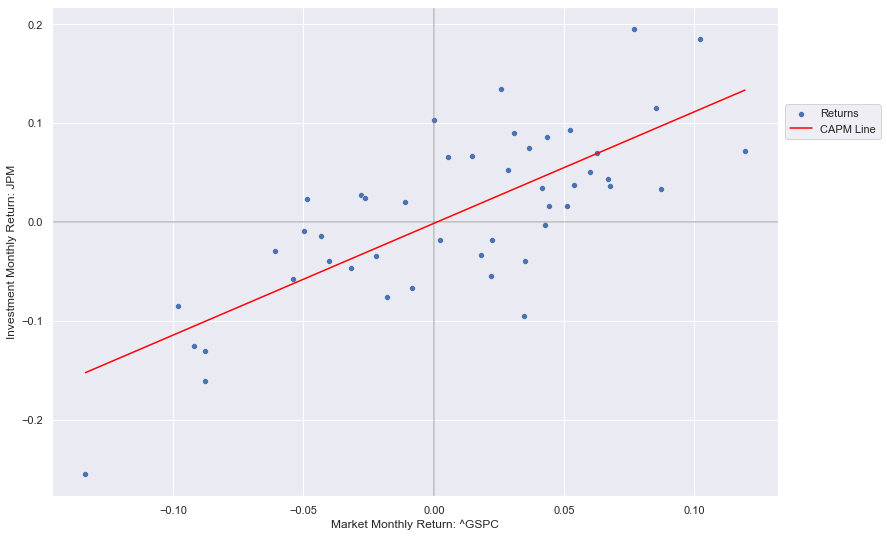

In [3]:
stock_a =['JPM']
stock_m = ['^GSPC']

start = pd.to_datetime('2020-01-01') 
end = pd.to_datetime('2024-01-01')

CAPM(stock_a,stock_m,start, end)